# Kimiya Ghanai codes for Machine Learning

## 1st code: Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Electricity.csv")
df.head(10)

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
5,2019-01-01 05:00:00,5525,5385,1395,91,958,1455,1456,0,30
6,2019-01-01 06:00:00,5513,5349,1392,98,938,1451,1440,0,31
7,2019-01-01 07:00:00,5524,5547,1392,93,1187,1446,1394,0,34
8,2019-01-01 08:00:00,5510,5471,1391,51,1325,1357,1303,8,34
9,2019-01-01 09:00:00,5617,5545,1388,15,1398,1328,1319,61,34


## Examining Correlation between Production and other components

In [10]:
numeric_df = df.select_dtypes(include=['int64','float64'])
correlation = numeric_df.corr()['Consumption'].sort_values(ascending=False)
correlation

Consumption      1.000000
Production       0.695097
Oil and Gas      0.488947
Coal             0.461859
Biomass          0.398717
Hydroelectric    0.293210
Nuclear          0.127617
Solar            0.126887
Wind             0.084882
Name: Consumption, dtype: float64

## Drawing the Chart

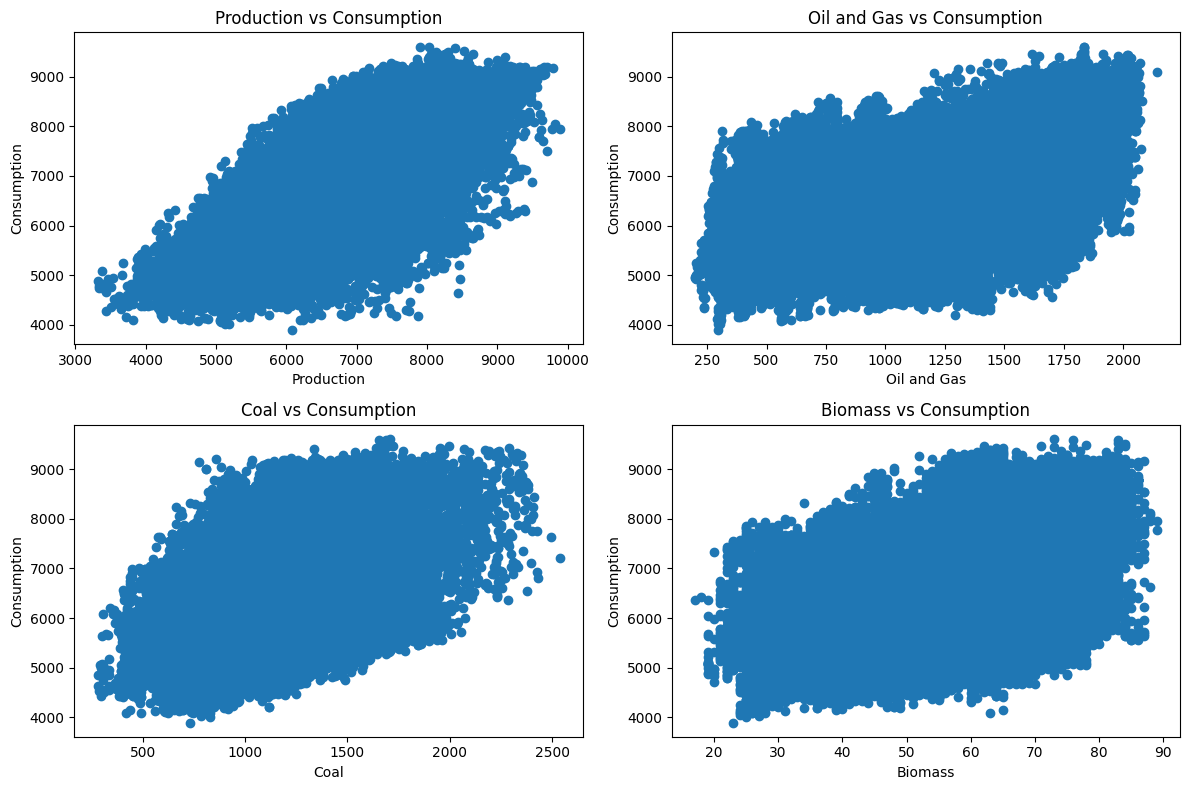

In [11]:
features = ['Production', 'Oil and Gas', 'Coal', 'Biomass']

plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[feature], df['Consumption'])
    plt.xlabel(feature)
    plt.ylabel('Consumption')
    plt.title(f'{feature} vs Consumption')

plt.tight_layout()
plt.show()

## Drawing the Linear Regression

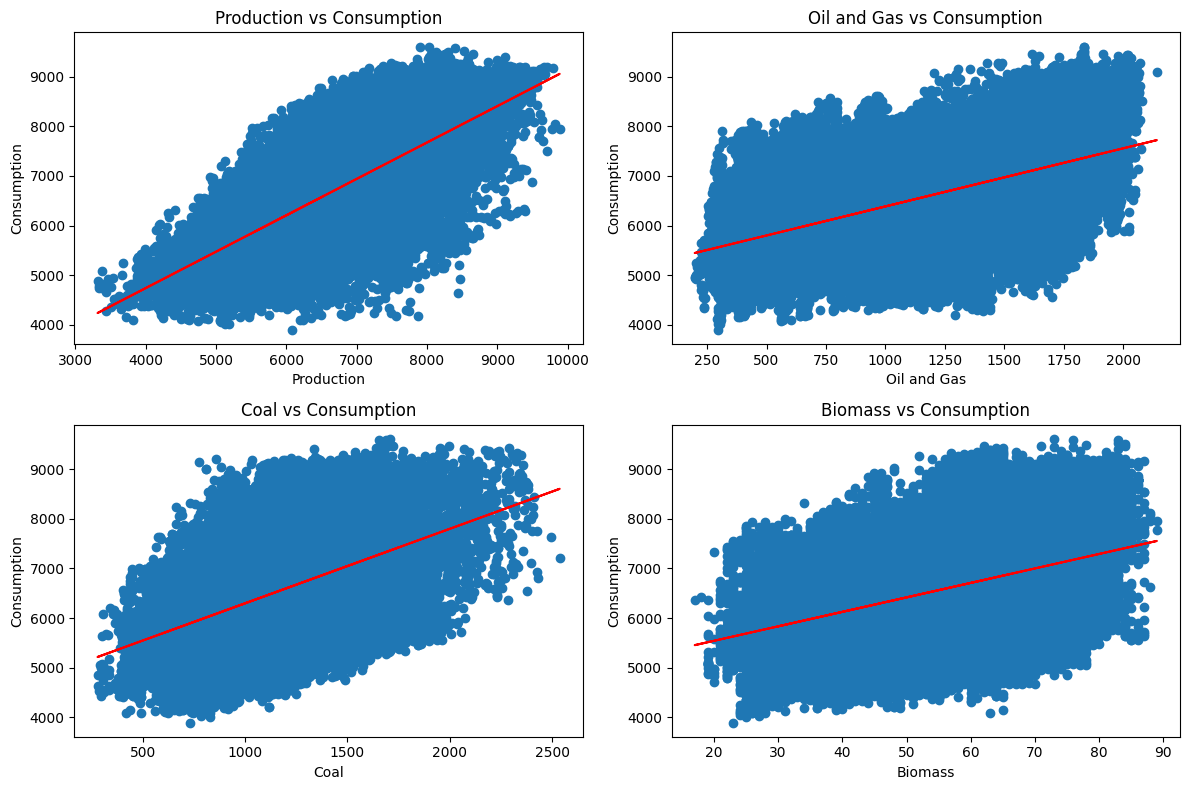

In [12]:
from sklearn.linear_model import LinearRegression
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    
    x = df[[feature]]
    y = df['Consumption']
    model = LinearRegression()
    model.fit(x, y)
    y_pred = model.predict(x)
    
    plt.scatter(x, y)
    plt.plot(x, y_pred, color='red')
    plt.xlabel(feature)
    plt.ylabel('Consumption')
    plt.title(f'{feature} vs Consumption')

plt.tight_layout()
plt.show()

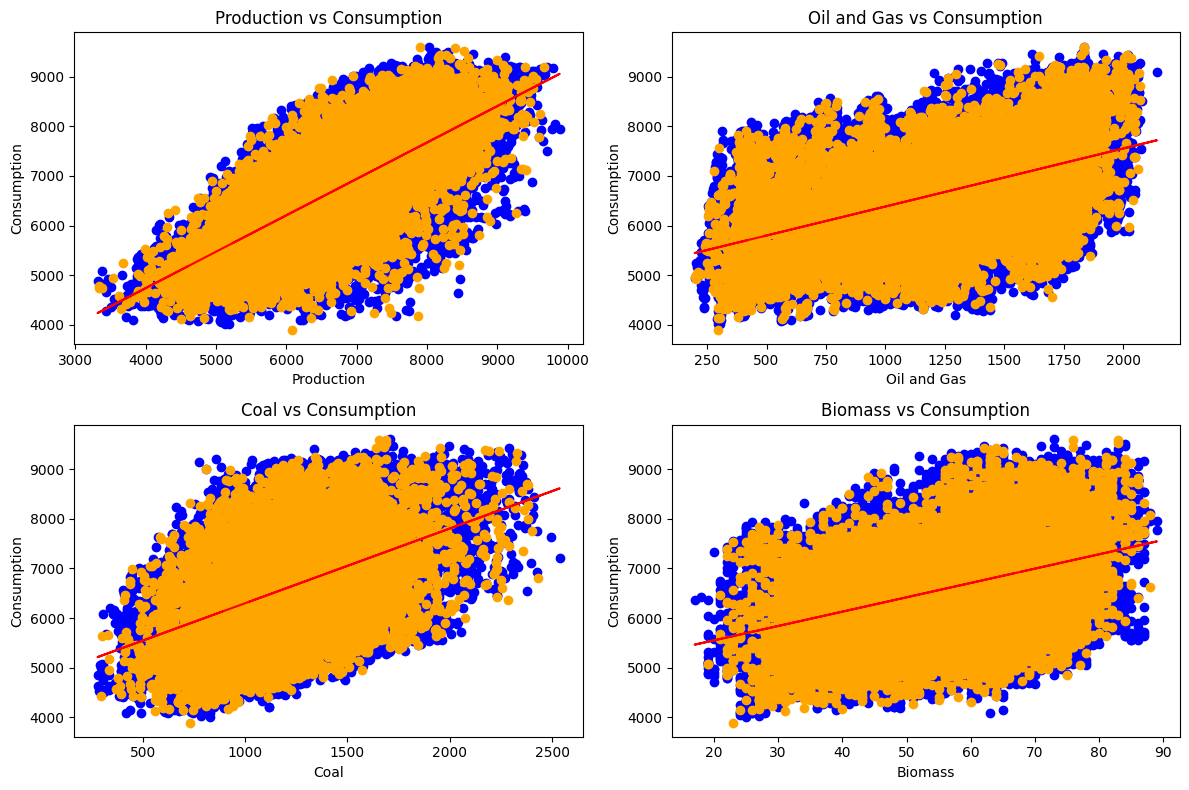

In [14]:
from sklearn.model_selection import train_test_split
plt.figure(figsize=(12, 8))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    x = df[[feature]]
    y = df['Consumption']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_train)
    
    plt.scatter(x_train, y_train, color='blue')
    plt.scatter(x_test, y_test, color='orange')
    plt.plot(x_train, y_pred, color='red')
    plt.xlabel(feature)
    plt.ylabel('Consumption')
    plt.title(f'{feature} vs Consumption')

plt.tight_layout()
plt.show()